# Training to recognize handwritten digits from MNIST

#### Keep the messeges short

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
#too keep the details short, but long enough to see the error messages

#### Import needed APIs

In [11]:
import tensorflow as tf
from tensorflow import keras
#keras is a tensorflow api for nn
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras import layers
#Layers are the basic building blocks of NN in Keras.
from tensorflow.keras.datasets import mnist
#mnist is a data set for visual recognition of handwritten digits, these are already-vectorized, in Numpy format
from matplotlib import pyplot as plt
#for performance visualization

#### Load the data

In [3]:
#here we're going to load the data
(x_train,y_train),(x_test, y_test) = mnist.load_data() 
print(x_train.shape)
print(y_train.shape)


(60000, 28, 28)
(60000,)


####  Reshape the data

In [4]:
#we see that the x shape is a bit of a problem, for the NN we need one long column
#so I'll flatten/reshapw/ covert the datasets
x_train= x_train.reshape(-1,28*28).astype("float32")/255
x_test = x_test.reshape(-1,28*28).astype("float32")/255
print(x_train.shape)

(60000, 784)


####  Create the model

In [5]:
import tensorflow as tf
from tensorflow import keras

from keras.layers.activation import relu
from keras.layers.serialization import activation
#can also do the training layer by layer
model=keras.Sequential()
model.add(keras.Input(shape=28*28))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10))

####  Compile the model

In [6]:
from keras.optimizers.optimizer_v2 import adam
from keras import optimizers

#describe a loss function where itcompares the target and predicted output values; measures how well the neural network models the training data. 
model.compile(
    #here i'Ll configure the loss function,tell keras how to learn
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = keras.optimizers.Adam(lr=0.001),
    metrics = ["Accuracy"],
    #sparse_categorical_crossentropy: Used as a loss function for multi-class classification model where the output label is assigned integer value (0, 1, 2, 3…).
)


C:\Users\86176\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


####  Fit and Evaluate the model

In [13]:
#Model fitting is the measure of how well a machine learning model generalizes data similar to that with which it was trained.
hist = model.fit(x_train, y_train, batch_size=32, epochs=5, verbose=2)

#The batch size is a number of samples processed before the model is updated.
#The number of epochs is the number of complete passes through the training dataset.
#verbose is the choice that how you want to see the output of your Nural Network while it's training.

#now we'll evaluate the data
model.evaluate(x_train, y_train, batch_size= 32,verbose=2)


Epoch 1/5
1875/1875 - 8s - loss: 0.0293 - Accuracy: 0.9910 - 8s/epoch - 4ms/step
Epoch 2/5
1875/1875 - 8s - loss: 0.0231 - Accuracy: 0.9927 - 8s/epoch - 4ms/step
Epoch 3/5
1875/1875 - 8s - loss: 0.0206 - Accuracy: 0.9933 - 8s/epoch - 4ms/step
Epoch 4/5
1875/1875 - 8s - loss: 0.0189 - Accuracy: 0.9942 - 8s/epoch - 4ms/step
Epoch 5/5
1875/1875 - 8s - loss: 0.0186 - Accuracy: 0.9941 - 8s/epoch - 4ms/step
1875/1875 - 4s - loss: 0.0118 - Accuracy: 0.9959 - 4s/epoch - 2ms/step


[0.011836199089884758, 0.9958833456039429]

####  Save the model for later use

In [8]:
import os.path
if os.path.isfile('models/MNIST_recognizer.h5') is False:
  model.save('models/MNIST_recognizer.h5')

####  Load and verify the model

In [9]:
from tensorflow.keras.models import load_model
new_model=load_model('models/MNIST_recognizer.h5')
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 FirstLayer (Dense)          (None, 512)               401920    
                                                                 
 SecondLayer (Dense)         (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


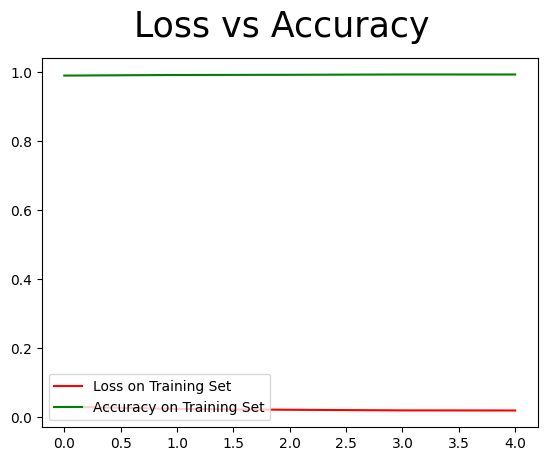

In [20]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='red', label='Loss on Training Set')
plt.plot(hist.history['Accuracy'], color='green', label='Accuracy on Training Set')
fig.suptitle('Loss vs Accuracy', fontsize=25)
plt.legend(loc="lower left")
plt.show()